# TD1 exo 1 sur le TFSD (Corrigé Octave)

Exécution interactive en ligne ici [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/balaise31/Signal/master?labpath=discret%2Ftd%2FFREQ_code%2Fexo1_tfsd_corr_octave.ipynb)

|        | Sujet | Corrigé |
|--------|-------|---------|
|Python  | [sujet python](./exo1_tfsd.ipynb) | [corrigé python](./exo1_tfsd_corr.ipynb) |
|Octave  | [sujet octave](./exo1_tfsd_octave.ipynb) | [corrigé octave](./exo1_tfsd_corr_octave.ipynb) |



Retour au [sujet de TD papier](../FREQ_sujet.ipynb)


L'axe des temps est discret donc facilement représentable avec $t=k\,Te$, il suffit de créer un vecteur du temps discret $k$ de -5 à 5 par exemple et de calculer le vecteur temps $t$ qui y correspond (utile pour l'affichage)



In [1]:
clear all; close all;
graphics_toolkit("gnuplot"); % pour windows
Fe=0.1; 
Te = 1/Fe; 

%% VOTRE CODE calculant k de -5 à 5: utilisez "dep:step:fin" pas de boucle
k=-5:5
%% VOTRE CODE calculant t : le produit entre scalaire et vecteur existe en math
%  donc aussi en octave
t=k*Te

%% SHIFT + ENTER pour exécuter la cellule de code.

k =

  -5  -4  -3  -2  -1   0   1   2   3   4   5

t =

  -50  -40  -30  -20  -10    0   10   20   30   40   50



Dans la TFSD les fréquences sont continues entre 0 et $F_e$ et impossible à stocker dans un ordinateur.
On s'en rapproche avec une résolution très fine  $\Delta_f=0.001$ 𝐻𝑧 (par exemple) comparée à la fréquence d'échantillonnage  𝐹𝑒=1  arbitraire. 

On peut choisir d'échantillonner en fréquence avec 1000 points entre 0 et $F_e$ et en déduire la résolution $\Delta_f=\frac{F_e}{1000}$. On peut calculer **inutilement** la TFSD pour des fréquences au-delà de $F_e$ pour vérifier la périodicité du spêctre. 

In [2]:
Df= Fe/1000; %résolution fine

%% VOTRE CODE: f=
% déclarant le vecteur f de -2.Fe à 2.Fe par pas de Df
f=-2*Fe: Df:2*Fe;

%% VOTRE CODE: N = 
% utilisez la fonction 'length' pour calculer  le nombre N
% de points du vecteur f 
N = length(f)

N =  4001


On définit la fonction impulsion unité $\delta_0[k] = 1$ uniquement si $k=0$, elle joue le même rôle que l'impulsion de Dirac. 

Pour cela on aurait pu faire un fichier dirac.m contenant :
``` octave
function val = delta(k)
          if k == 0 
              val= 1
          else 
              val = 0
          end
     return val
```     
Pour faire le *si alors sinon* en une seule ligne on peut profiter d'une astuce où un booléen vrai vaut 1 et un faux vaut 0, donc l'expression "k == 0" est un booléen, mais aussi une valeur numérique qui convient. La fonction deviendrait 
``` octave
function val = delta(k)
     return (k==0)
```     

Si la fonction tient en une ligne alors on profite des fonctions anonymes. Par exemple f = x^2 -3 deviendrait
``` octave
 f = @(x) x.^2 -3
```     
Cette fonction est vectorisée et donc ```f(1:10)``` retourne bien un vecteur de la fonction évaluée en 10 points.

Déclarez delta et affichez-la :

In [3]:
%% VOTRE CODE : delta = 
% déclarant la fonction  k |---> delta[k]
delta = @(k) k==0 ; 

%% VOTRE CODE : x0 = 
% stockez dans un vecteur x0 la valeur de delta 
%  calculée pour toute les valeur du vecteur k (pas de boucle !)
x0 = delta(k);

l=2;
%% VOTRE CODE :  xl = 
%                 |__c'est un l minuscule pas un 1 ! 
% le vecteur des valeurs de delta[k-l]
xl = delta(k-l); % retardé de l=2 échantillons


% On affiche vos signaux (pas de : et la valeur est listé)
% première ligne le temps, deuxième les valeurs
signal_x0=[k ; x0] 
signal_xl=[k ; xl]

 

signal_x0 =

  -5  -4  -3  -2  -1   0   1   2   3   4   5
   0   0   0   0   0   1   0   0   0   0   0

signal_xl =

  -5  -4  -3  -2  -1   0   1   2   3   4   5
   0   0   0   0   0   0   0   1   0   0   0



On va utiliser les fonctions d'affichage `stem` et `plot` pour représenter ces signaux.
Pour accéder à de l'aide et tester des commandes : utilisez la console.

> **Ouvrez une console** :
>  File→New→Console (onglet) ou File→New console for notebook (console en bas)  
> Choisissez le kernel (octave ici)

Dans la console tapez `help stem` pour obtenir de l'aide

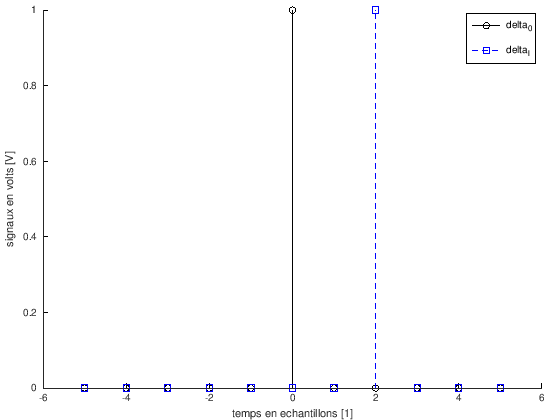

In [4]:
%% VOTRE CODE : stem(...)
% affichant les deux signaux 
stem(k,x0,'k');
hold on;
stem(k,xl,'sb--'); %"Squares Blue en --"

% éventuellement utilisez 'hold on' pour ne pas effacer un graphique
% changez le style d'affichage 'r--' rouge avec tirets 'sk' des 'Squares' en blacK
legend(['delta_0';'delta_l'])
xlabel('temps en echantillons [1]')
ylabel('signaux en volts [V]')

Il suffit ensuite de faire un script TFSD qui fait le calcul pour chaque fréquence contenue dans le vecteur f (supposé être continu de 0 à Fe) avec tous les instants contenu dans k (qui est bien un vecteur d'entiers, mais supposé être infini...)

C'est déjà fait ! 
Faites `help tfsd` dans la console et jetez un œil au script [tfsd](tfsd.m) qui ressemble beaucoup aux scripts de deuxieme année.

Pour les affichages à gauche temporel, à droite fréquentiel, en haut partie réelle et en bas partie imaginaire, je vous ai fait la fonction [plot_dual](plot_dual.m).

À vous de mettre les bonnes légendes avec les bonnes sunités.

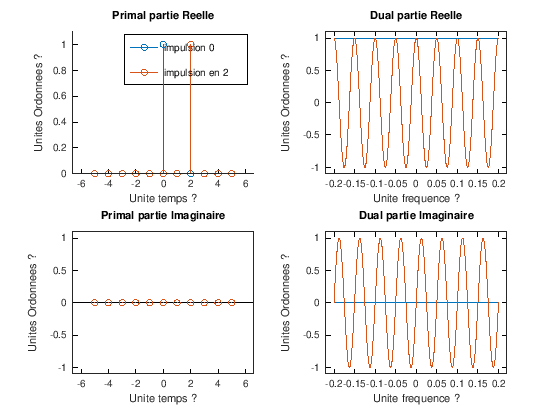

In [5]:
%% VOTRE CODE tfsd_x0 =
% appelle la fonction tfsd avec le signal x0 
% pour obtenir de spoints de la tfsd de x0 pour toutes valeur de f
tfsd_x0 = tfsd(x0,k,f,Te);

%% VOTRE CODE tfsd_xl= 
tfsd_xl = tfsd(xl,k,f,Te);

%% COMPLETEZ les ? : l'appel de plot dual pour indiquer les unités
plot_dual([k; k],"Unite temps ?",
        [x0; xl],"Unites Ordonnees ?",
        [f;f],"Unite frequence ?",
        [tfsd_x0; tfsd_xl],"Unites Ordonnees ?",
        ["impulsion 0";"impulsion en 2"],
        primalDiscret=true,
        dualDiscret=false);

On a donc bien tfsd$[\delta_0][n]= 1$ et tfsd$[\delta_2][n]= e^{-i\,2\pi\,f\;2T_e}$

On peut vérifier autrement qu'à l'œil, en calculant l'énergie de l'erreur entre le calcul et la formule :

In [6]:
% On calcule exp(-i.2.pi.f.l.Te) pour toutes valeur de f
tfsd_xl_theorique = exp(i*2*pi*f*l*Te);

% on calcule le vecteur d'erreur entre calcul numérique 
% et formule théorique
erreur = tfsd_xl - tfsd_xl_theorique;

% on calcule la norme au carré de l'erreur 
% ||erreur||^2 = <<erreur, erreur>>
norme_carre_erreur = transpose(erreur) * erreur;
size(norme_carre_erreur)

ans =

   4001   4001



Oups le calcul n'est pas bien formé le produit scalaire n'est pas scalaire, mais une grosse matrice !

> Corrigez ce produit de manière à avoir un produit scalaire !


In [7]:
%% VOTRE CODE : norme_carre_erreur =
% corrigeant l'erreur de dimension des vecteurs
norme_carre_erreur = erreur * transpose(erreur)


norme_carre_erreur = -8000.0


La norme de l'erreur n'est pas positive !
> Attention `transpose(v)` et `v'` ne sont pas la même chose !  
> `v' = conj(transpose(v))` où v est le conjugué

Corrigez encore !

In [8]:
%% VOTRE CODE: norme_carre_erreur =
% la norme doit être positive
norme_carre_erreur = erreur * erreur'

norme_carre_erreur =  8000


La norme est positive, mais vaut 8000 et donc pas nulle !

> J'ai mis une erreur bêêêêêête dans l'un des deux signaux (la norme doit être bonne maintenant)  
> Affichez les deux signaux `tfsd_xl` et `tfsd_xl_theorique` pour voir qui est faux et quelle erreur bête  

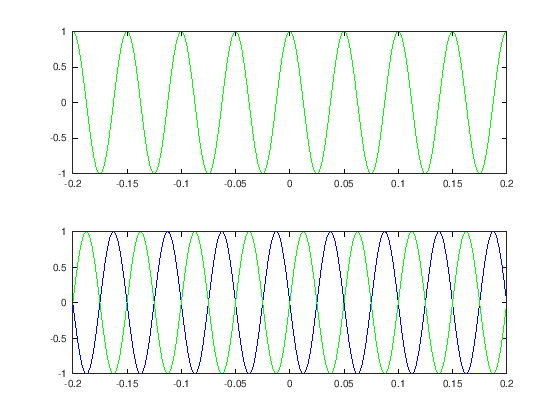

In [9]:
%% VOTRE CODE : affichant le signal 
subplot(211)
plot(f,real(tfsd_xl),'b',f,real(tfsd_xl_theorique),'g')
subplot(212)
plot(f,imag(tfsd_xl),'b',f,imag(tfsd_xl_theorique),'g')



On corrige : on voit que la partie imaginaire est opposée (impaire)....

>Ça sent l'erreur de signe dans une exponentielle !

In [10]:
%% VOTRE CODE : corrigeant l'erreur et recalculant

tfsd_xl_theorique = exp(-i*2*pi*f*l*Te);
%                       |___ erreur de signe qui fait que l'on a le conjugué

erreur = tfsd_xl - tfsd_xl_theorique;

norme_carre_erreur = erreur * erreur'

norme_carre_erreur = 0


Ouf on est bon ! 

On peut **regarder le corrigé** pour voir les différences de style et différents langages
  - [exo1 tfsd corrigé octave](exo1_tfsd_corr_octave.ipynb)
  - [exo1 tfsd corrigé python](exo1_tfsd_corr_oython.ipynb)
